<a href="https://colab.research.google.com/github/waelrash1/forecastingmodelsPY/blob/main/ch02/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#!/usr/bin/env python
# coding: utf-8

In [ ]:
# change the cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.width", 120)

In [ ]:
# To avoid SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [ ]:

# Loading data into a dataframe
data_url='https://raw.githubusercontent.com/waelrash1/timeSeriesPy/master/data/jj.csv'
df = pd.read_csv(data_url)

In [ ]:
# Showing top records in the dataframe
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [ ]:
# Showing bottom records in the dataframe
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# Split to train/test 

In [ ]:
# Splitting data into train and test sets
train = df[:-4]
test = df[-4:]

# Plot data with train/test split 

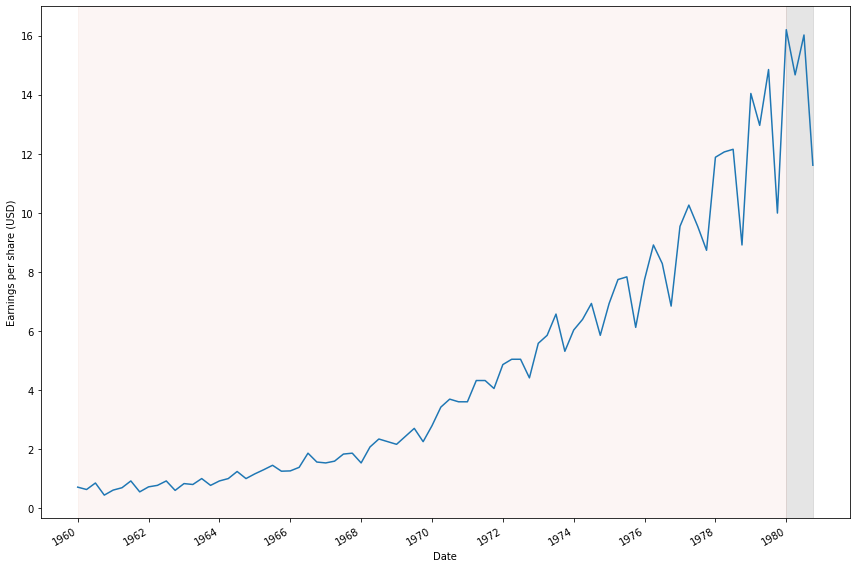

In [ ]:

# Plotting data with train/test split
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting date on x-axis and data on y-axis
ax.plot(df['date'], df['data'])

# Setting x-axis label
ax.set_xlabel('Date')

# Setting y-axis label
ax.set_ylabel('Earnings per share (USD)')

# Highlighting the test data in the plot
ax.axvspan(80, 83, color='#808080', alpha=0.2)
# Highlight training data
ax.axvspan(0, 80, color='#e9a296', alpha=0.1)
# Adding x-axis ticks at specified intervals
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Formatting x-axis labels
fig.autofmt_xdate()

# Adjusting layout
plt.tight_layout()

# Saving the plot to a file
plt.savefig('figures/CH02_F01_peixeiro.png', dpi=300)

# Predict historical mean 

In [ ]:
# Predicting historical mean
historical_mean = np.mean(train['data'])

In [ ]:

# Adding predicted values to test set
test.loc[:, 'pred_mean'] = historical_mean

# Showing test set with predicted values
test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [ ]:
# Function to calculate mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Calculating MAPE for historical mean prediction
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

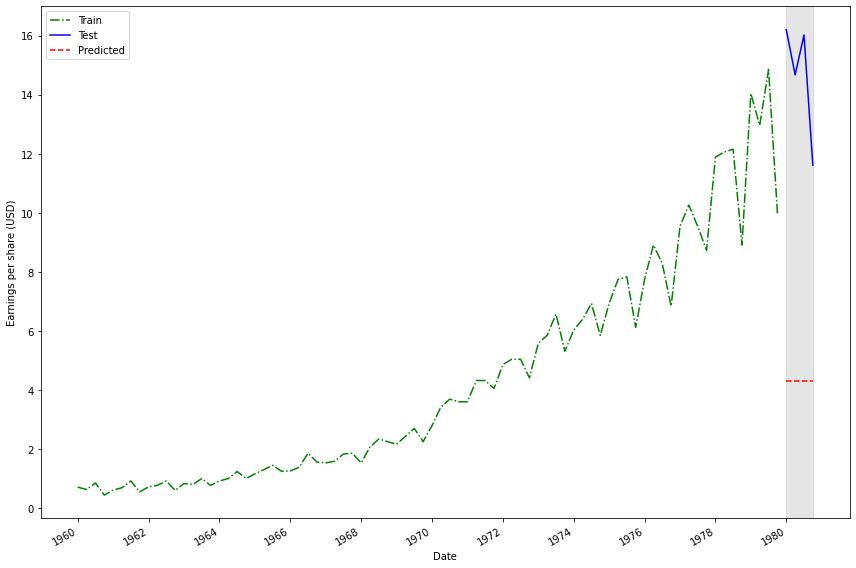

In [ ]:

# Plotting train and test data with historical mean prediction
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting train data
ax.plot(train['date'], train['data'], 'g-.', label='Train')

# Plotting test data
ax.plot(test['date'], test['data'], 'b-', label='Test')

# Plotting predicted historical mean
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')

# Setting x-axis label
ax.set_xlabel('Date')

# Setting y-axis label
ax.set_ylabel('Earnings per share (USD)')

# Highlighting the test data in the plot
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)


# Predict last year mean

In [ ]:
# Calculate the mean of the last 4 values of the 'data' column in the 'train' DataFrame
last_year_mean = np.mean(train['data'][-4:])
# Print the mean value
last_year_mean

12.96

In [ ]:
# Add a new column named 'pred__last_yr_mean' to the 'test' DataFrame and fill it with the value of 'last_year_mean'
test.loc[:, 'pred__last_yr_mean'] = last_year_mean
# Print the 'test' DataFrame to verify the new column
test


,date,data,pred_mean,pred_last,pred_last_season,pred__last_yr_mean
80,1980-01-01,16.20,4.3085,9.99,14.04,12.96
81,1980-04-01,14.67,4.3085,9.99,12.96,12.96
82,1980-07-02,16.02,4.3085,9.99,14.85,12.96
83,1980-10-01,11.61,4.3085,9.99,9.99,12.96


In [ ]:
# Calculate the Mean Absolute Percentage Error (MAPE) between the 'data' column in the 'test' DataFrame and the 'pred__last_yr_mean' column
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
# Print the MAPE value
mape_last_year_mean

15.5963680725103

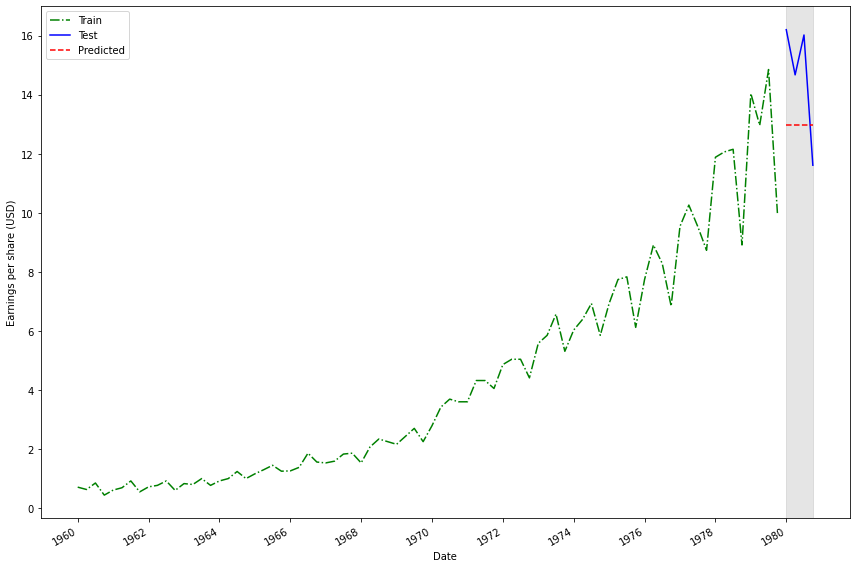

In [ ]:

# Create a figure and a subplot (ax)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the 'data' column in the 'train' DataFrame with a green dotted line, labeled as 'Train'
ax.plot(train['date'], train['data'], 'g-.', label='Train')
# Plot the 'data' column in the 'test' DataFrame with a blue line, labeled as 'Test'
ax.plot(test['date'], test['data'], 'b-', label='Test')
# Plot the 'pred__last_yr_mean' column in the 'test' DataFrame with a red dashed line, labeled as 'Predicted'
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
# Set the label for the x-axis as 'Date'
ax.set_xlabel('Date')
# Set the label for the y-axis as 'Earnings per share (USD)'
ax.set_ylabel('Earnings per share (USD)')
# Add a gray background color to the plot between dates 80 and 83 with an alpha of 0.2
ax.axvspan(80, 83, color='#808080', alpha=0.2)
# Add a legend to the plot at location 2
ax.legend(loc=2)

# Set the x-axis ticks at every 8th value from 0 to 85, with labels at [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Automatically format the x-axis labels
fig.autofmt_xdate()
# Adjust the layout of the plot to reduce the whitespace
plt.tight_layout()

# Save the plot as a PNG image with a resolution of 300 dpi, to the 'figures' directory with the file name 'CH02_F07_peixeiro.png'
plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)


# Predict last know value 

In [ ]:
# Predict last known value

# Get the last value from the training set 'data' column
last = train['data'].iloc[-1]
# Print the last value
print(last)


9.99


In [ ]:

# Add a new column 'pred_last' to the test set with the last value
test['pred_last'] = last
# Print the updated test set
print(test)

          date   data  pred_mean  pred_last  pred_last_season  \
80  1980-01-01  16.20     4.3085       9.99             14.04   
81  1980-04-01  14.67     4.3085       9.99             12.96   
82  1980-07-02  16.02     4.3085       9.99             14.85   
83  1980-10-01  11.61     4.3085       9.99              9.99   

    pred__last_yr_mean  
80               12.96  
81               12.96  
82               12.96  
83               12.96  


In [ ]:

# Calculate the mean absolute percentage error (MAPE) between the test set 'data' and 'pred_last' columns
mape_last = mape(test['data'], test['pred_last'])
# Print the MAPE
print(mape_last)

30.457277908606535


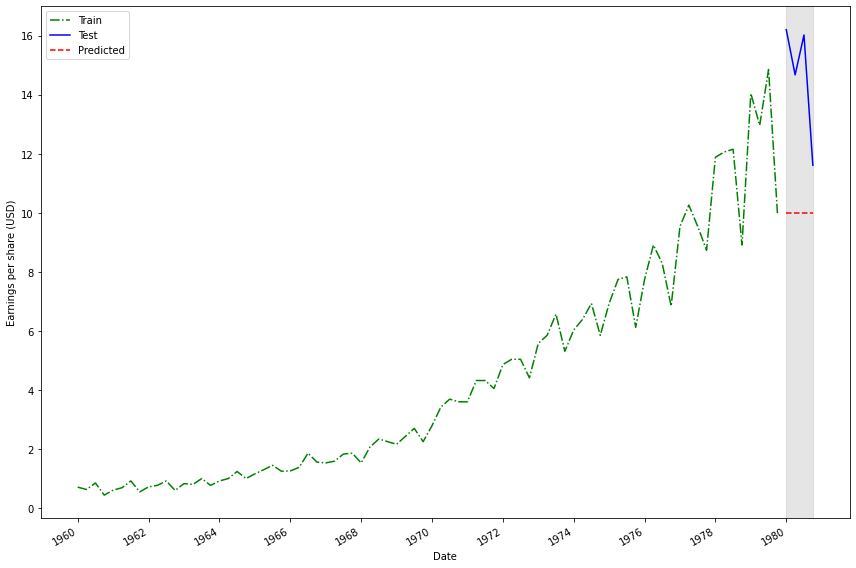

In [ ]:

# Plot the train set 'data', the test set 'data', and the predicted values from 'pred_last'
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
# Save the plot to a file
plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

# Naive seasonal forecast 

In [ ]:
# Add a new column 'pred_last_season' to the test set with the last 4 values from the train set 'data' column
test['pred_last_season'] = train['data'][-4:].values
# Print the updated test set
print(test)


          date   data  pred_mean  pred_last  pred_last_season  pred__last_yr_mean
80  1980-01-01  16.20     4.3085       9.99             14.04               12.96
81  1980-04-01  14.67     4.3085       9.99             12.96               12.96
82  1980-07-02  16.02     4.3085       9.99             14.85               12.96
83  1980-10-01  11.61     4.3085       9.99              9.99               12.96


In [ ]:
# Calculate the mean absolute percentage error (MAPE) between the test set 'data' and 'pred_last_season' columns
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
# Print the MAPE
print(mape_naive_seasonal)

11.561658552433654


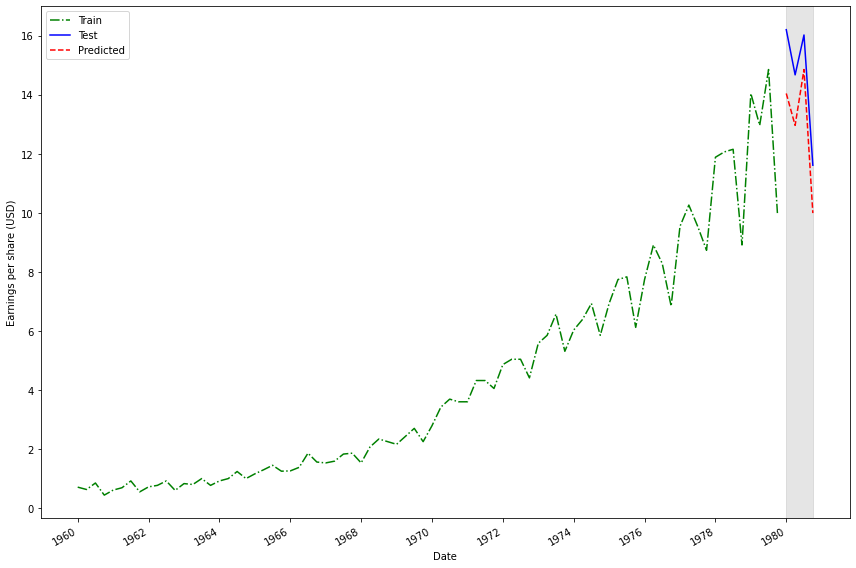

In [ ]:


# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the train set 'data' in green dotted line style
ax.plot(train['date'], train['data'], 'g-.', label='Train')

# Plot the test set 'data' in blue line style
ax.plot(test['date'], test['data'], 'b-', label='Test')

# Plot the predicted values from 'pred_last_season' in red dashed line style
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')

# Set x-axis label as 'Date'
ax.set_xlabel('Date')

# Set y-axis label as 'Earnings per share (USD)'
ax.set_ylabel('Earnings per share (USD)')

# Add a gray shaded region with 80% opacity from x-value 80 to 83
ax.axvspan(80, 83, color='#808080', alpha=0.2)

# Add a legend to the plot located at position 2
ax.legend(loc=2)

# Set x-axis tick marks every 8 units with labels representing the year
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Automatically format x-axis dates
fig.autofmt_xdate()

# Adjust the layout of the plot to ensure tight fit of all elements
plt.tight_layout()

# Save the plot to a file named 'figures/CH02_F09_peixeiro.png' with a resolution of 300 dpi
plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)



# Compare all Models

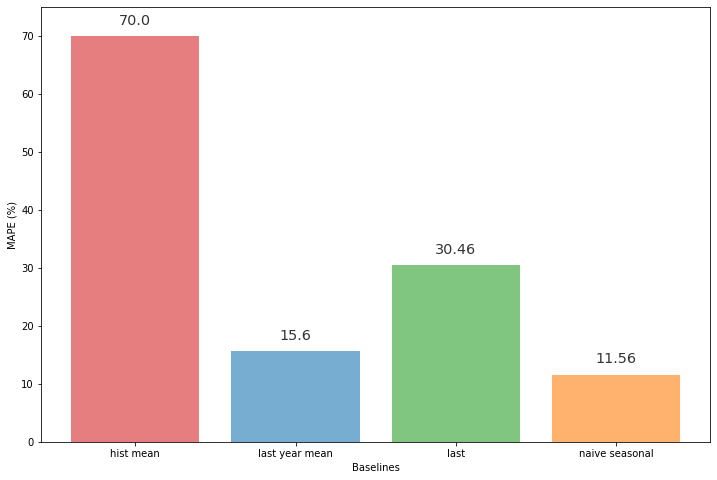

<Figure size 432x288 with 0 Axes>

In [ ]:

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))


models = ['hist mean', 'last year mean', 'last', 'naive seasonal']
MAPE = [70.00, 15.60, 30.46, 11.56]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(model, MAPE, width=0.8, alpha=.6, color=bar_colors)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(MAPE):
    plt.text(x=index, y=value+2 , s=str(value), ha='center', fontsize='x-large', alpha=.8)


plt.show()

plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)

